# LSTM on Tully's system

#### Python Coding TangDD 4/10/2021
#### C Coding JiaLY 3/1/2021

### Libraries

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import random

2021-11-09 22:25:28.054483: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /public1/soft/gcc/10.2.0/lib64:/public1/soft/openmpi/3.1.6-intel/lib:/public1/soft/intel/2017/debugger_2017/libipt/intel64/lib:/public1/soft/intel/2017/debugger_2017/iga/lib:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/daal/../tbb/lib/intel64_lin/gcc4.4:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/daal/lib/intel64_lin:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/tbb/lib/intel64/gcc4.7:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/mkl/lib/intel64_lin:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/ipp/lib/intel64:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/mpi/lib64:/public1/soft/intel/2017/compilers_and_libraries_2017.5.2

In [2]:
import matplotlib.pyplot as plt

### Read Data and Generate Dataset

#### FORMAT OF DATASET

       0 1 2  3  4      5      6      7      8
NTRAJ,[X,V,E0.E1.RERHO0,RERHO1,IMRHO1,ACTIVE,POSS]

In [3]:
# This is a 1 a.u. timestep.
f=open("../reference_50/result_traj_2.txt",'r')
rawdata=f.readlines()
f.close()

nvel=0
ntraj=0

for i in range(0,len(rawdata)):
    dataline=rawdata[i].split()
    if (len(dataline)>0):
        if (dataline[0]=='VELOC'):
            nvel+=1
        if (dataline[0]=='TRAJ'):
            ntraj+=1 

nele=len(rawdata[-1].split())

In [4]:
print("nvel=",nvel,"ntraj=",ntraj,"nele=",nele)

nvel= 37 ntraj= 1850 nele= 9


In [5]:
all_data_x=[]
all_data_y=[]
elec_value=[]
itraj=-1
for i in range(0,len(rawdata)):
    dataline=rawdata[i].split()
    if (len(dataline)>0):
        if (dataline[0]=='TRAJ'):
            itraj+=1
            all_data_x.append([])
            all_data_y.append([])
    if (len(dataline)>2):
        ele_train=[0,1,2,3,4,5,6]
        ele_test =[4,5,6]
        #for j in range(nele):
        temp_list=[]
        for j in ele_train:
            temp_list.append(float(dataline[j]))
        all_data_x[itraj].append(temp_list)
        temp_list=[]
        for j in ele_test:
            temp_list.append(float(dataline[j]))
        all_data_y[itraj].append(temp_list)
        elec_value.append(float(dataline[4]))

In [6]:
del rawdata

In [7]:
#elec_value_numpy=np.array(elec_value)
#del elec_value
#elec_max = elec_value_numpy.max()
#elec_min = elec_value_numpy.min()
#elec_avg = np.mean(elec_value_numpy)
#del elec_value_numpy
#print(elec_max,elec_min,elec_avg)

In [8]:
for i in range(itraj):
    print(len(all_data_x[i]),len(all_data_y[i]))

7959 7959
7959 7959
7989 7989
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
8016 8016
8006 8006
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
8011 8011
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7997 7997
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7994 7994
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
7959 7959
8004 8004
7990 7990
7959 7959
7959 7959
7585 7585
7585 7585
7585 7585
7616 7616
7687 7687
7585 7585
7585 7585
7770 7770
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7623 7623
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7644 7644
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585
7608 7608
7633 7633
7585 7585
7585 7585
7640 7640
7585 7585
8621 8621
7585 7585
7585 7585
7585 7585
7585 7585
7585 7585


1421 1421
1428 1428
1423 1423
1421 1421
1421 1421
1442 1442
1424 1424
1421 1421
1421 1421
1424 1424
1424 1424
1421 1421
1443 1443
1424 1424
1421 1421
1424 1424
1424 1424
1422 1422
1441 1441
1424 1424
1424 1424
1423 1423
1424 1424
1421 1421
1421 1421
1442 1442
1442 1442
1421 1421
1441 1441
1442 1442
1422 1422
1424 1424
1438 1438
1422 1422
1423 1423
1421 1421
1423 1423
1422 1422
1422 1422
1442 1442
1424 1424
1442 1442
1366 1366
1370 1370
1352 1352
1352 1352
1355 1355
1353 1353
1370 1370
1369 1369
1354 1354
1367 1367
1354 1354
1370 1370
1354 1354
1353 1353
1354 1354
1354 1354
1354 1354
1352 1352
1352 1352
1370 1370
1370 1370
1355 1355
1352 1352
1354 1354
1370 1370
1355 1355
1353 1353
1355 1355
1353 1353
1370 1370
1354 1354
1354 1354
1357 1357
1356 1356
1352 1352
1354 1354
1369 1369
1368 1368
1352 1352
1370 1370
1353 1353
1354 1354
1369 1369
1369 1369
1352 1352
1370 1370
1369 1369
1352 1352
1354 1354


#### Get a 100-length subset for all trajectories

A minor concern: initial velocity results in different length of trajs.

input_length is the input timelength.

In [9]:
input_length = 50
predict_length = 1

In [10]:
# This is batched data.
all_data_packed_x=[]
all_data_packed_y=[]

# From each trajectory...
for i in range(ntraj):
    for j in range(0,len(all_data_x[i])-input_length-predict_length):
        if (j%20==0):
            all_data_packed_x.append(all_data_x[i][j:j+input_length])
            all_data_packed_y.append(all_data_y[i][j+input_length+predict_length-1])
        """
        if (i<10):
            if (j%20==0):
                all_data_packed_x.append(all_data_x[i][j:j+input_length])
                all_data_packed_y.append(all_data_y[i][j+input_length+predict_length-1])
        else:
            if (j%10==0):
                all_data_packed_x.append(all_data_x[i][j:j+input_length])
                all_data_packed_y.append(all_data_y[i][j+input_length+predict_length-1])
        """
        #start_pop=all_data_x[i][j][4]
        #end_pop  =all_data_x[i][j+input_length-1][4]
        #pop_change = np.abs(end_pop-start_pop)
        #pop_change_list.append(pop_change)
        #if (j%10==0 or pop_change>0.02):
            #all_data_packed_x.append(all_data_x[i][j:j+input_length])
            #all_data_packed_y.append(all_data_y[i][j+input_length:j+input_length+predict_length])
            #all_data_packed_y.append(all_data_y[i][j+input_length+predict_length])


In [11]:
del all_data_x
del all_data_y

In [12]:
nsamp=len(all_data_packed_x)

In [13]:
len(all_data_packed_x[33])

50

In [14]:
all_data_packed_x[9999]

[[-10.218517919,
  0.005495216,
  -1.6e-08,
  0.050000016,
  0.999999994,
  -9.485e-06,
  -7.6298e-05],
 [-10.213022703,
  0.005495216,
  -1.6e-08,
  0.050000016,
  0.999999994,
  -9.539e-06,
  -7.6774e-05],
 [-10.207527486,
  0.005495216,
  -1.7e-08,
  0.050000017,
  0.999999994,
  -9.592e-06,
  -7.7252e-05],
 [-10.20203227,
  0.005495216,
  -1.7e-08,
  0.050000017,
  0.999999994,
  -9.646e-06,
  -7.7733e-05],
 [-10.196537054,
  0.005495216,
  -1.7e-08,
  0.050000017,
  0.999999994,
  -9.699e-06,
  -7.8217e-05],
 [-10.191041838,
  0.005495216,
  -1.7e-08,
  0.050000017,
  0.999999994,
  -9.754e-06,
  -7.8703e-05],
 [-10.185546622,
  0.005495216,
  -1.8e-08,
  0.050000018,
  0.999999994,
  -9.808e-06,
  -7.9192e-05],
 [-10.180051406,
  0.005495216,
  -1.8e-08,
  0.050000018,
  0.999999994,
  -9.863e-06,
  -7.9684e-05],
 [-10.174556189,
  0.005495216,
  -1.8e-08,
  0.050000018,
  0.999999993,
  -9.917e-06,
  -8.0179e-05],
 [-10.169060973,
  0.005495216,
  -1.8e-08,
  0.050000018,
  0.99

In [15]:
all_data_packed_y[9999]

[0.999999989, -1.2472e-05, -0.000103601]

In [16]:
all_data_packed_x[10000]

[[-10.108613593,
  0.005495217,
  -2.1e-08,
  0.050000021,
  0.999999992,
  -1.0597e-05,
  -8.6331e-05],
 [-10.103118376,
  0.005495217,
  -2.2e-08,
  0.050000022,
  0.999999992,
  -1.0655e-05,
  -8.6862e-05],
 [-10.09762316,
  0.005495217,
  -2.2e-08,
  0.050000022,
  0.999999992,
  -1.0714e-05,
  -8.7397e-05],
 [-10.092127943,
  0.005495217,
  -2.2e-08,
  0.050000022,
  0.999999992,
  -1.0773e-05,
  -8.7934e-05],
 [-10.086632727,
  0.005495217,
  -2.2e-08,
  0.050000022,
  0.999999992,
  -1.0832e-05,
  -8.8474e-05],
 [-10.08113751,
  0.005495217,
  -2.3e-08,
  0.050000023,
  0.999999992,
  -1.0892e-05,
  -8.9017e-05],
 [-10.075642293,
  0.005495217,
  -2.3e-08,
  0.050000023,
  0.999999992,
  -1.0952e-05,
  -8.9563e-05],
 [-10.070147076,
  0.005495217,
  -2.3e-08,
  0.050000023,
  0.999999992,
  -1.1012e-05,
  -9.0112e-05],
 [-10.06465186,
  0.005495217,
  -2.4e-08,
  0.050000024,
  0.999999992,
  -1.1072e-05,
  -9.0664e-05],
 [-10.059156643,
  0.005495217,
  -2.4e-08,
  0.050000024,

#### FORMAT OF DATASET

NTRAJ,[X,V,E0.E1.RERHO0,RERHO1,IMRHO1,ACTIVE,POSS]

Say, we are planning to feed X(t),V(t),E0(t),E1(t),RHO0(t),ACT(t) into the network, and get RHO0(t+50),ACT(t+50).

In [17]:
dataset_x=np.array(all_data_packed_x)
dataset_y=np.array(all_data_packed_y)

In [18]:
del all_data_packed_x
del all_data_packed_y

In [19]:
dataset_x.shape

(355776, 50, 7)

In [20]:
dataset_y.shape

(355776, 3)

#### Normalize

In [21]:
for i in range(nsamp):
    for j in range(input_length):
        dataset_x[i][j][0]=dataset_x[i][j][0]/20.0
        #dataset_x[i][j][1]=(dataset_x[i][j][1]*2000.0-19.0)/16.0
        #dataset_x[i][j][2]=dataset_x[i][j][2]*5.0
        #dataset_x[i][j][3]=dataset_x[i][j][3]*5.0
        dataset_x[i][j][1]=(dataset_x[i][j][1]*2000-17.0)/30.0
        dataset_x[i][j][2]=dataset_x[i][j][2]*20.0
        dataset_x[i][j][3]=dataset_x[i][j][3]*20.0
        dataset_x[i][j][4]=dataset_x[i][j][4]-0.5
        #dataset_x[i][j][4]=(dataset_x[i][j][4]-elec_avg)/(elec_max-elec_min)
        #dataset_x[i][j][5]=dataset_x[i][j][5]
        #dataset_x[i][j][6]=dataset_x[i][j][6]
    
for i in range(nsamp):
    dataset_y[i][0]=dataset_y[i][0]-0.5
    #dataset_y[i][0]=(dataset_y[i][0]-elec_avg)/(elec_max-elec_min)
    #dataset_y[i][1]=dataset_y[i][1]
    #dataset_y[i][2]=dataset_y[i][2]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=42)

## Build Model

In [23]:
model = Sequential()
model.add(LSTM(48, activation='tanh', input_shape=(dataset_x.shape[1], dataset_x.shape[2]), return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(48, activation='tanh', return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(48, activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(3, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

2021-11-09 22:30:11.641762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /public1/soft/gcc/10.2.0/lib64:/public1/soft/openmpi/3.1.6-intel/lib:/public1/soft/intel/2017/debugger_2017/libipt/intel64/lib:/public1/soft/intel/2017/debugger_2017/iga/lib:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/daal/../tbb/lib/intel64_lin/gcc4.4:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/daal/lib/intel64_lin:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/tbb/lib/intel64/gcc4.7:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/mkl/lib/intel64_lin:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/ipp/lib/intel64:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/mpi/lib64:/public1/soft/intel/2017/compilers_and_libraries_2017.5.239/linux/m

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 48)            10752     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 48)            18624     
_________________________________________________________________
lstm_2 (LSTM)                (None, 48)                18624     
_________________________________________________________________
dense (Dense)                (None, 3)                 147       
Total params: 48,147
Trainable params: 48,147
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=1, batch_size=32)

2021-11-09 22:30:13.804079: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
7116/7116 [==============================] - 881s 123ms/step - loss: 2.1286e-04 - val_loss: 8.7160e-06
Epoch 2/5
7116/7116 [==============================] - 906s 127ms/step - loss: 1.0142e-05 - val_loss: 4.7303e-06
Epoch 3/5
7116/7116 [==============================] - 923s 130ms/step - loss: 6.2016e-06 - val_loss: 3.9067e-06
Epoch 4/5
7116/7116 [==============================] - 929s 131ms/step - loss: 4.1494e-06 - val_loss: 2.4994e-06
Epoch 5/5
7116/7116 [==============================] - 920s 129ms/step - loss: 3.3956e-06 - val_loss: 1.1317e-06


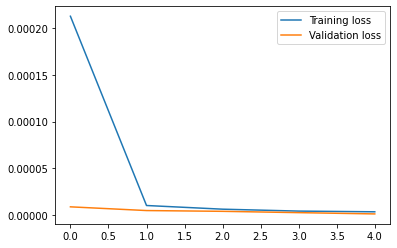

In [26]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()

In [27]:
# So let's check a trajectory...
test_output = model.predict(x_test, verbose=0)

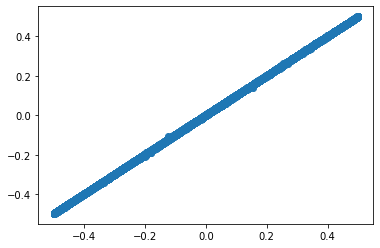

In [28]:
plt.scatter(y_test,test_output)

In [29]:
fo=open('tully_out_100.txt','w')
for ii in range(0,len(y_test.squeeze())):
    fo.write("{0}\t{1}\n".format(y_test[ii][0], test_output[ii][0]))
fo.close()

In [30]:
# Export the model to a SavedModel
model.save('model', save_format='tf')

2021-11-09 23:47:02.431245: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/assets


In [31]:
model.save('model_h5', save_format='h5')

In [32]:
test_output.size

213468

In [33]:
test_output[:,0]

array([0.50085443, 0.5005906 , 0.45344964, ..., 0.5006481 , 0.50047946,
       0.500682  ], dtype=float32)

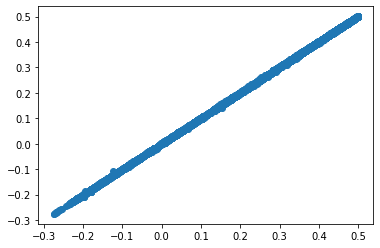

In [34]:
plt.scatter(y_test[:,0],test_output[:,0])